In [1]:
msg = "asdasdasd"
print(msg)

asdasdasd


Created 100 data points
First 5 X values: [3.74540119 9.50714306 7.31993942 5.98658484 1.5601864 ]
First 5 y values: [10.66489651 21.41627143 17.82340039 10.99803185  5.68102903]

Training samples: 80
Testing samples: 20

Model Parameters:
Slope (coefficient): 1.920
Intercept: 3.286
Expected was: y = 2x + 3

Model Performance:
Mean Squared Error: 2.615
Root Mean Squared Error: 1.617


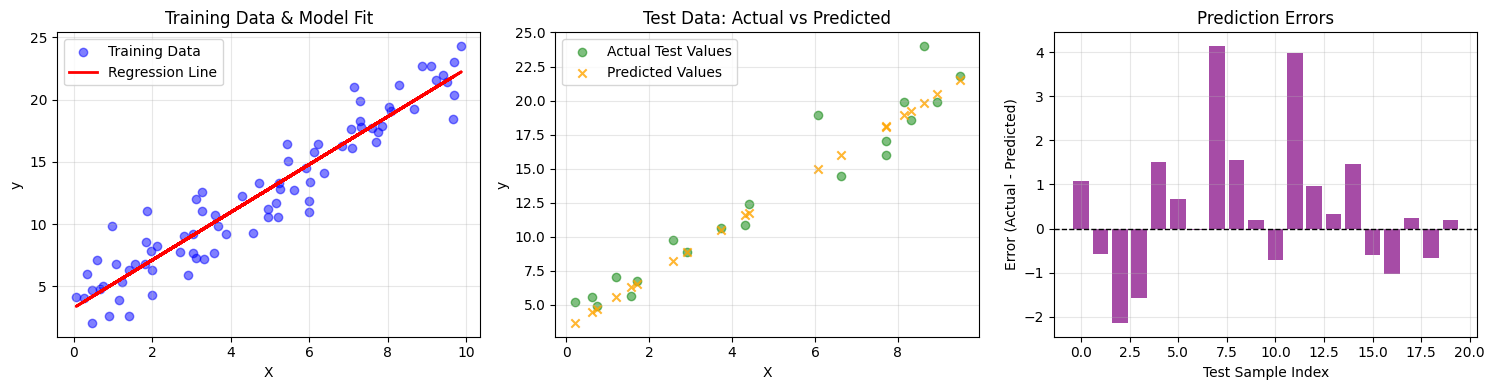


Example Prediction:
For X = 5.5, predicted y = 13.84
Expected (approximately): 14.0 = 14.0


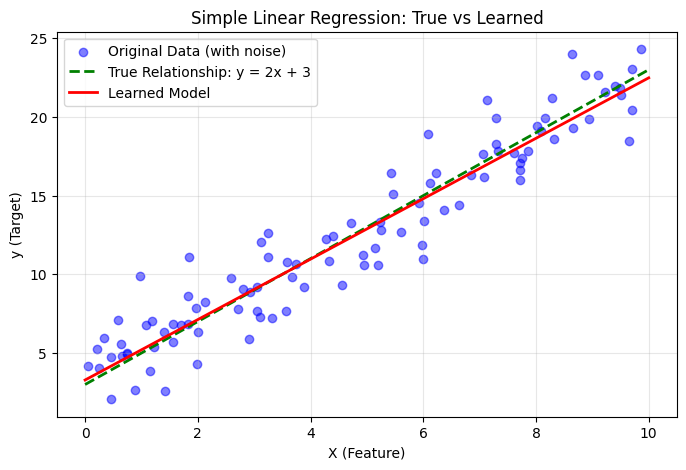

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# ========== 1. CREATE DUMMY DATA ==========
# Let's create simple data: y = 2x + 3 + some noise
np.random.seed(42)  # For reproducibility
X = np.random.rand(100, 1) * 10  # 100 random numbers between 0 and 10
y = 2 * X + 3 + np.random.randn(100, 1) * 2  # y = 2x + 3 + noise

print(f"Created {len(X)} data points")
print(f"First 5 X values: {X[:5].flatten()}")
print(f"First 5 y values: {y[:5].flatten()}")

# ========== 2. SPLIT DATA ==========
# Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"\nTraining samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

# ========== 3. CREATE AND TRAIN MODEL ==========
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Get the learned parameters
print(f"\nModel Parameters:")
print(f"Slope (coefficient): {model.coef_[0][0]:.3f}")
print(f"Intercept: {model.intercept_[0]:.3f}")
print(f"Expected was: y = 2x + 3")

# ========== 4. MAKE PREDICTIONS ==========
# Predict on test set
y_pred = model.predict(X_test)

# Calculate error
mse = mean_squared_error(y_test, y_pred)
print(f"\nModel Performance:")
print(f"Mean Squared Error: {mse:.3f}")
print(f"Root Mean Squared Error: {np.sqrt(mse):.3f}")

# ========== 5. VISUALIZE RESULTS ==========
# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Plot 1: Training Data with Regression Line
axes[0].scatter(X_train, y_train, color='blue', alpha=0.5, label='Training Data')
axes[0].plot(X_train, model.predict(X_train), color='red', linewidth=2, label='Regression Line')
axes[0].set_xlabel('X')
axes[0].set_ylabel('y')
axes[0].set_title('Training Data & Model Fit')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Test Data Predictions
axes[1].scatter(X_test, y_test, color='green', alpha=0.5, label='Actual Test Values')
axes[1].scatter(X_test, y_pred, color='orange', alpha=0.8, label='Predicted Values', marker='x')
axes[1].set_xlabel('X')
axes[1].set_ylabel('y')
axes[1].set_title('Test Data: Actual vs Predicted')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Plot 3: Error Visualization
axes[2].bar(range(len(X_test)), y_test.flatten() - y_pred.flatten(), 
           color='purple', alpha=0.7)
axes[2].axhline(y=0, color='black', linestyle='--', linewidth=1)
axes[2].set_xlabel('Test Sample Index')
axes[2].set_ylabel('Error (Actual - Predicted)')
axes[2].set_title('Prediction Errors')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# ========== 6. MAKE A PREDICTION ON NEW DATA ==========
new_X = np.array([[5.5]])  # New data point
prediction = model.predict(new_X)
print(f"\nExample Prediction:")
print(f"For X = {new_X[0][0]}, predicted y = {prediction[0][0]:.2f}")
print(f"Expected (approximately): {2*5.5 + 3} = 14.0")

# ========== 7. BONUS: SIMPLE VISUALIZATION ==========
# Another simple chart showing the relationship
plt.figure(figsize=(8, 5))

# Generate line for perfect relationship (without noise)
X_perfect = np.linspace(0, 10, 100)
y_perfect = 2 * X_perfect + 3

plt.scatter(X, y, alpha=0.5, label='Original Data (with noise)', color='blue')
plt.plot(X_perfect, y_perfect, 'g--', label='True Relationship: y = 2x + 3', linewidth=2)
plt.plot(X_perfect, model.predict(X_perfect.reshape(-1, 1)), 
         'r-', label='Learned Model', linewidth=2)
plt.xlabel('X (Feature)')
plt.ylabel('y (Target)')
plt.title('Simple Linear Regression: True vs Learned')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()